Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.499218,0.621894,0.960023,0.632413,0.488164,0.818592,0.817136,0.716595,0.606611,0.637507,0.809633,0.549692,0.564516,1.000000,0.503456,0.681697
1 - email,0.460231,NaN,0.654189,0.892244,0.593255,0.516000,0.915802,0.683001,0.710214,0.544712,0.462817,0.552112,0.597376,0.695652,0.933968,0.442686,0.643617
2 - form,0.444608,0.454373,NaN,0.971951,0.749994,0.620653,0.957927,0.912103,0.669621,0.580250,0.798505,0.835958,0.459578,0.810491,1.000000,0.429401,0.713028
3 - handwritten,0.554563,0.457079,0.594061,NaN,0.611538,0.562506,0.689227,0.585367,0.603823,0.514628,0.476023,0.567644,0.512831,0.681814,0.844993,0.529032,0.585675
4 - advertisement,0.458873,0.540699,0.662039,0.539756,NaN,0.441859,0.609595,0.673561,0.519201,0.436229,0.471953,0.557763,0.458952,0.537362,0.745418,0.469073,0.541489
5 - scientific report,0.445509,0.509490,0.765871,0.894637,0.687981,NaN,0.596821,0.627360,0.822200,0.514347,0.712746,0.625255,0.593984,0.682036,0.793059,0.498326,0.651308
6 - scientific publication,0.497057,0.734648,0.955243,0.885011,0.866508,0.533478,NaN,0.957927,0.829781,0.597275,0.898913,0.859509,0.780618,0.915854,0.910485,0.681124,0.793562
7 - specification,0.448079,0.510883,0.600946,0.887901,0.428255,0.423679,0.708910,NaN,0.612352,0.490157,0.492117,0.608082,0.532018,0.470037,1.000000,0.466020,0.578629
8 - file folder,0.411064,0.337566,0.400075,0.421083,0.508793,0.383704,0.417555,0.403297,NaN,0.410847,0.422222,0.391339,0.350034,0.387609,0.376630,0.364093,0.399061


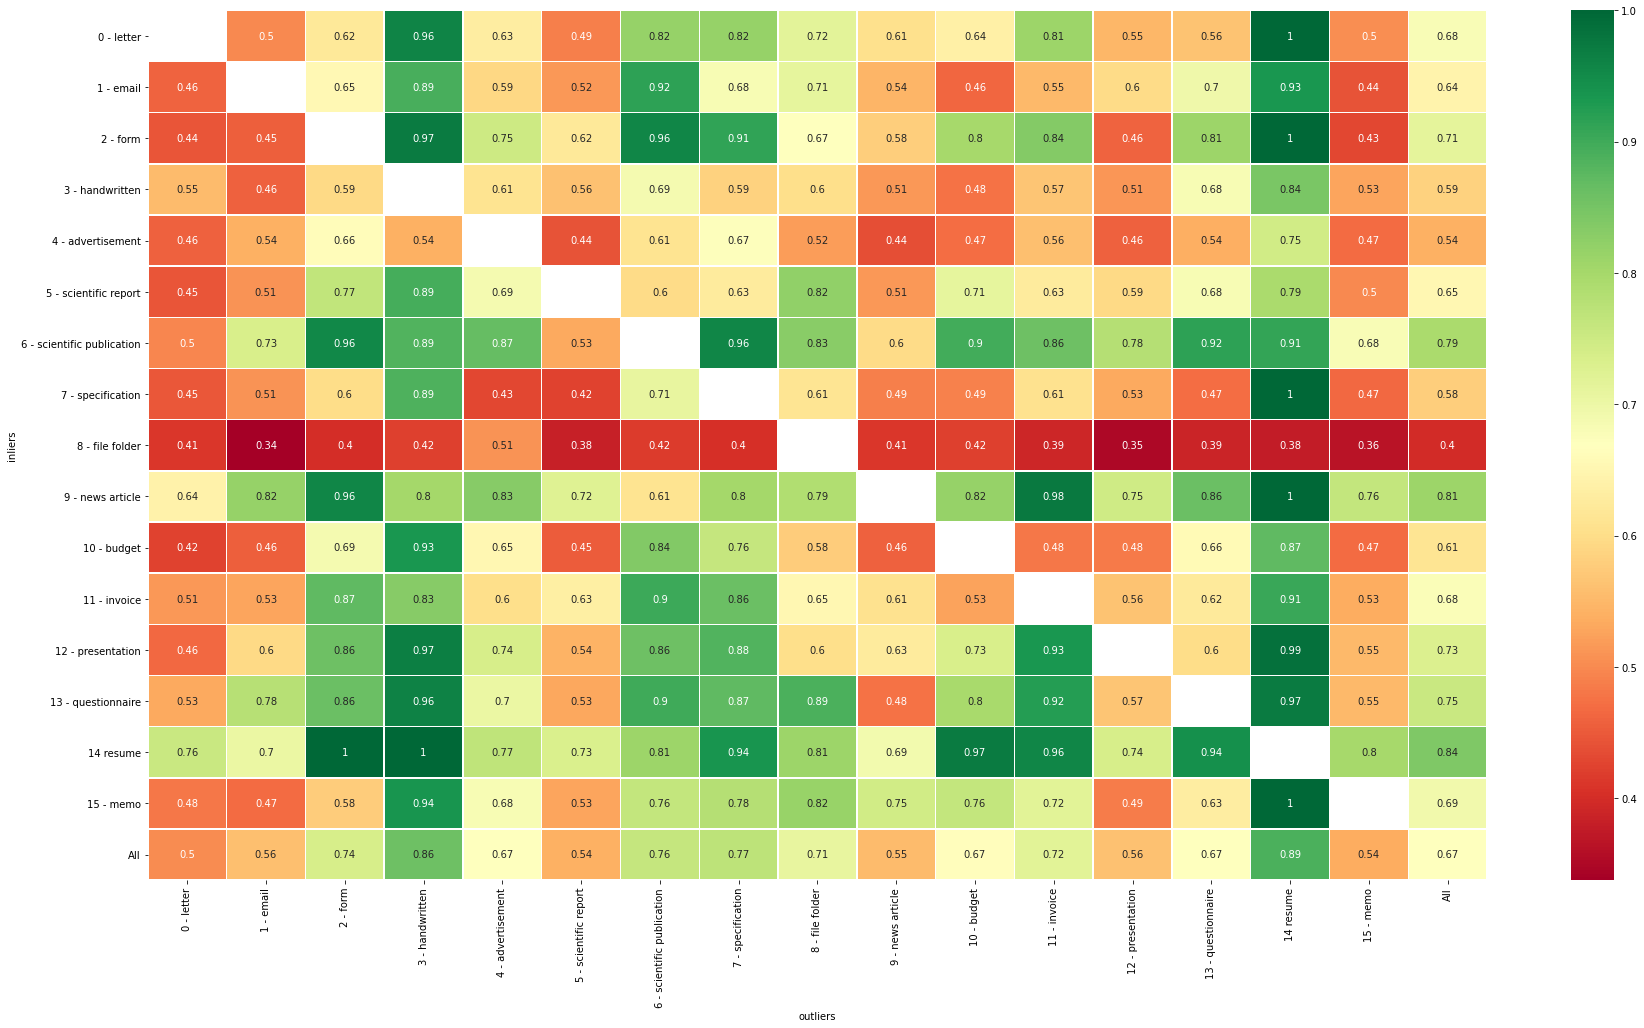

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from natsort import natsorted, order_by_index, index_natsorted
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

data_path = "/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv"
df = pd.read_csv(data_path, sep="\t")

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}
df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
#df = df.where(df.labeled_data == 1.0).dropna()

df = df[[score, inliers, outliers]]
df = df.pivot_table(columns=outliers, index=inliers, values=score, margins=True)

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.068203,-0.239670,-0.037829,-0.187555,-0.084442,0.097628,-0.323603,-0.162464,0.152453,0.002901,-0.212441,0.038615,-0.143082,0.000000,0.076679,-0.063641
1 - email,-0.009770,NaN,0.117071,-0.083757,-0.004798,0.101767,-0.000103,-0.127450,-0.025275,0.159191,-0.004598,-0.167890,0.003446,-0.148252,-0.019868,-0.044860,-0.017010
2 - form,-0.041017,-0.021487,NaN,0.000000,-0.039568,-0.161345,0.028049,-0.119697,-0.193947,-0.111615,-0.016986,-0.022886,-0.011076,0.087794,0.000000,-0.071430,-0.046347
3 - handwritten,-0.082181,-0.016074,-0.003184,NaN,0.005724,-0.003519,0.106340,-0.027662,0.102488,0.099023,0.034548,0.063987,-0.134257,0.041783,-0.060914,-0.133243,-0.000476
4 - advertisement,-0.009083,0.037191,0.054574,-0.253687,NaN,-0.043111,-0.100017,-0.053176,0.111574,-0.047663,-0.113716,-0.066181,-0.002217,0.055540,-0.283522,0.011318,-0.046812
5 - scientific report,-0.039215,0.088747,0.048283,-0.126477,0.103848,NaN,0.002334,-0.147931,-0.081791,0.098462,0.022842,-0.152141,0.046391,0.035860,0.088686,0.066419,0.003621
6 - scientific publication,-0.278001,0.066645,0.047390,0.000000,0.038214,0.006187,NaN,0.028049,-0.147436,0.264317,0.065269,-0.112690,0.108856,0.056098,-0.042125,0.170941,0.018114
7 - specification,-0.034075,-0.039004,-0.250488,-0.139949,-0.067355,-0.082875,-0.252273,NaN,-0.245707,0.050082,-0.076536,-0.236217,-0.208077,-0.120696,0.000000,-0.128729,-0.122127
8 - file folder,0.000000,0.000000,0.000000,-0.061538,0.000000,0.000000,-0.130628,-0.041026,NaN,-0.033333,-0.029630,-0.026667,0.000000,-0.075152,0.000000,0.000000,-0.026532


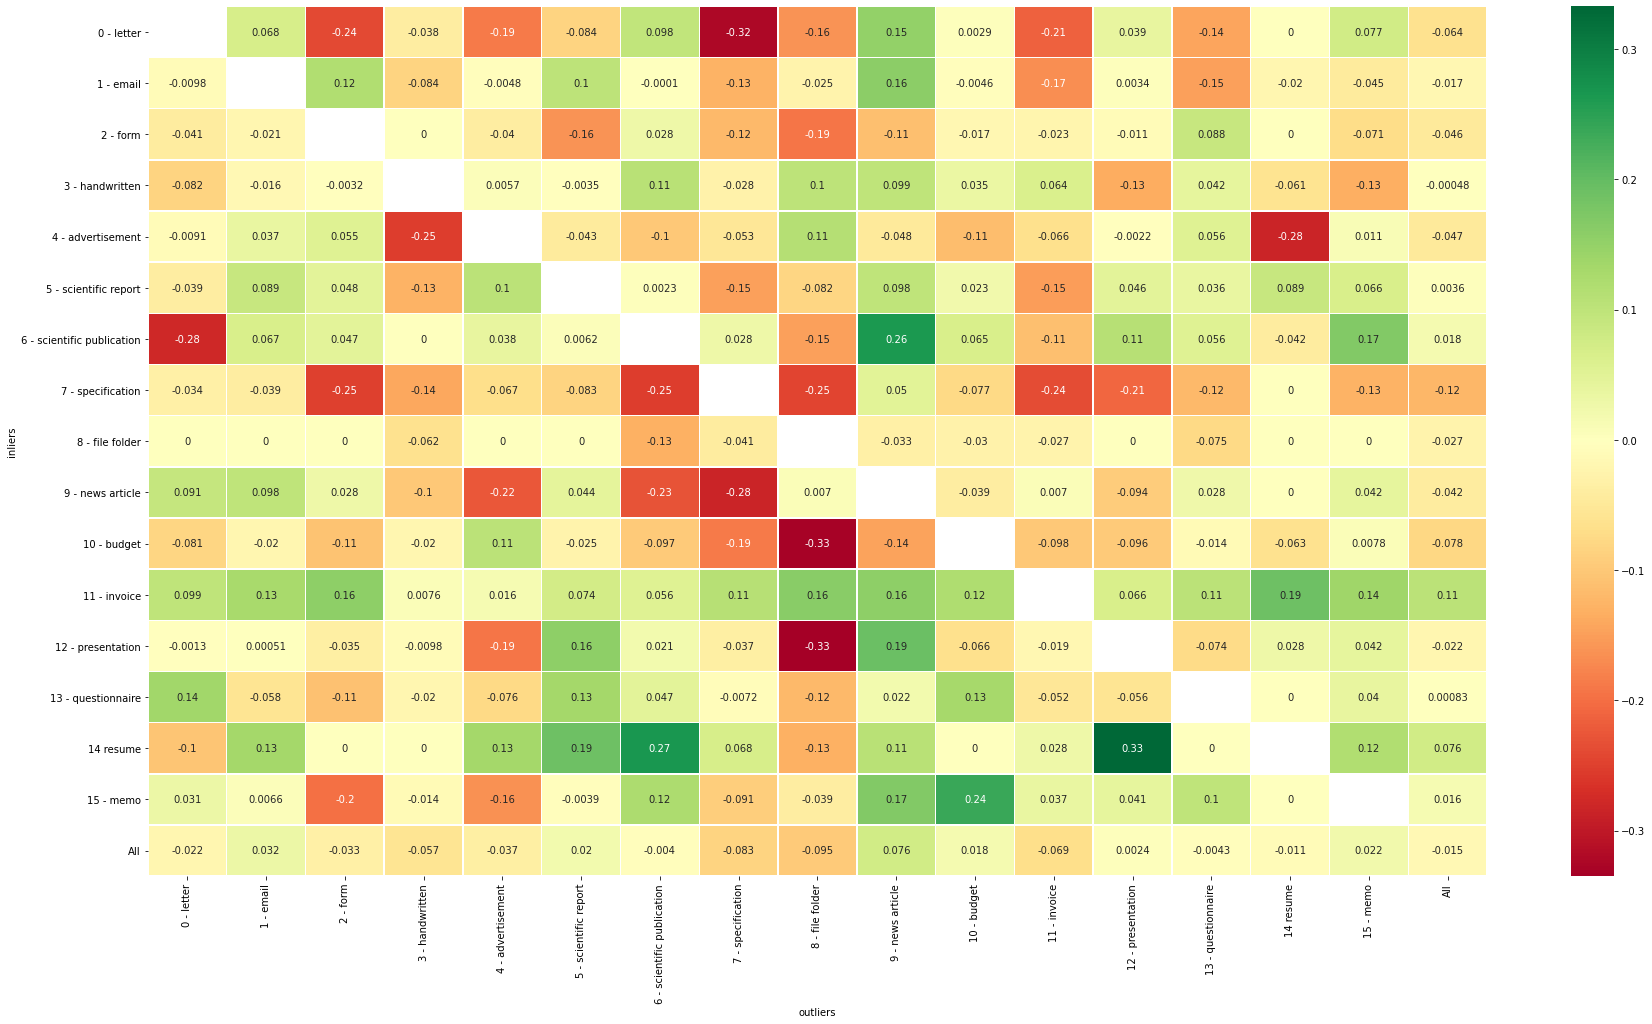

In [49]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

data_path = "/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv"
df = pd.read_csv(data_path, sep="\t")

df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df_semi = df.where(df.labeled_data == 0.8).dropna()[[score, inliers, outliers]]
df_super = df.where(df.labeled_data == 1.0).dropna()[[score, inliers, outliers]]

df_semi = df_semi.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df_super = df_super.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df = df_semi - df_super

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

In [40]:
from natsort import natsorted
natsorted(["1 book", "10 books", "3 books"])

['1 book', '3 books', '10 books']